In [8]:
from loader import Loader
from log import logger
from opts import Config
import time
import pandas as pd

loader = Loader('vgg11_cifar10', Config.root_path + '/tfevents/vgg11_cifar10/..')
tic = time.time()
scalars = loader.load_scalars()
logger.info('load scalars consmue {}'.format(time.time() - tic))
tic = time.time()
tensors = loader.load_tensors()
logger.info('load tensors consume {}'.format(time.time() - tic))
scalars

INFO:tensorflow:Event Multiplexer initializing.
INFO:tensorflow:Event Multiplexer done initializing
INFO:tensorflow:Starting AddRunsFromDirectory: ../tfevents/vgg11_cifar10/..
INFO:tensorflow:Adding events from directory ../tfevents/vgg11_cifar10/../vgg11_cifar10
INFO:tensorflow:Constructing EventAccumulator for ../tfevents/vgg11_cifar10/../vgg11_cifar10
INFO:tensorflow:Done with AddRunsFromDirectory: ../tfevents/vgg11_cifar10/..
INFO:tensorflow:Beginning EventMultiplexer.Reload()
INFO:tensorflow:No path found after ../tfevents/vgg11_cifar10/../vgg11_cifar10/events.out.tfevents.1500539613.deepstation
INFO:tensorflow:Finished with EventMultiplexer.Reload()


2017-07-20 16:38:15,442 - loader.py - [line:27] - INFO - reload consume time 30.7034409046
2017-07-20 16:38:15,498 - <ipython-input-8-393a57162388> - [line:10] - INFO - load scalars consmue 0.00200796127319
2017-07-20 16:41:06,970 - <ipython-input-8-393a57162388> - [line:13] - INFO - load tensors consume 171.470771074


,acc,loss,val_acc,val_loss
0,0.13156,7.558245,0.1454,7.511126
1,0.17576,7.506195,0.2088,7.498263
2,0.15258,7.601239,0.1000,7.697995
3,0.10000,7.637783,0.1000,7.600890
4,0.10000,7.582485,0.1000,7.567765
5,0.10000,7.254681,0.1000,6.255698
6,0.10000,6.232026,0.1000,6.219235
7,0.10000,5.822876,0.1000,4.922634
8,0.10000,4.904716,0.1000,4.895343
9,0.10000,4.891667,0.1000,4.888906


In [30]:
analysor=pd.DataFrame() 
for tensor_name in tensors.columns:
    mean_s=pd.Series()
    mean_s.index = mean_s.index.astype('int64')
    std_s = pd.Series()
    std_s.index=std_s.index.astype('int64') 
    for ind,val in tensors[tensor_name].iteritems():
        mean_s[ind]=val.mean()
        std_s[ind]=val.std()
    if mean_s.mean()>0.05 or mean_s.mean()<-0.01:
        continue
    analysor[tensor_name+'/mean']=mean_s 
#     analysor[tensor_name+'/std']=std_s

In [31]:
import matplotlib
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt 
# matplotlib.style.use('ggplot')
# analysor = analysor.reindex(scalars.index)
# analysor = pd.concat([analysor,scalars],axis=1)
analysor

,obs7/conv2d/kernel_1/mean,obs3/conv2d/kernel_1/mean,obs5/conv2d/kernel_1/mean,obs6/conv2d/bias_1/mean,obs3/conv2d/bias_1/mean,obs0/conv2d/kernel_1/mean,obs2/conv2d/kernel_1/mean,obs3/conv2d_act/mean,obs4/conv2d_act/mean,obs4/conv2d/bias_1/mean,...,obs7/conv2d/bias_1/mean,obs2/conv2d_act/mean,obs2/conv2d/bias_1/mean,obs1/conv2d/bias_1/mean,obs6/conv2d_act/mean,obs5/conv2d_act/mean,obs5/conv2d/bias_1/mean,obs1/conv2d/kernel_1/mean,obs6/conv2d/kernel_1/mean,obs1/conv2d_act/mean
0,0.000014,0.000032,0.000020,0.000014,0.000001,-0.002093,-0.000054,0.001705,0.000646,0.000002,...,0.000001,-0.003920,0.000001,-6.339992e-07,-0.000359,0.000666,0.000004,0.000042,-0.000006,-0.005247
5,0.000014,0.000031,0.000019,-0.000019,-0.000060,-0.002107,-0.000055,0.001497,0.000570,-0.000025,...,-0.000258,-0.004020,-0.000024,-4.680046e-05,-0.000404,0.000662,-0.000081,0.000039,-0.000006,-0.005664
10,0.000013,0.000031,0.000019,-0.000105,-0.000101,-0.002126,-0.000056,0.001236,0.000465,-0.000057,...,-0.000409,-0.004127,-0.000043,-6.880060e-05,-0.000517,0.000541,-0.000124,0.000038,-0.000006,-0.005829


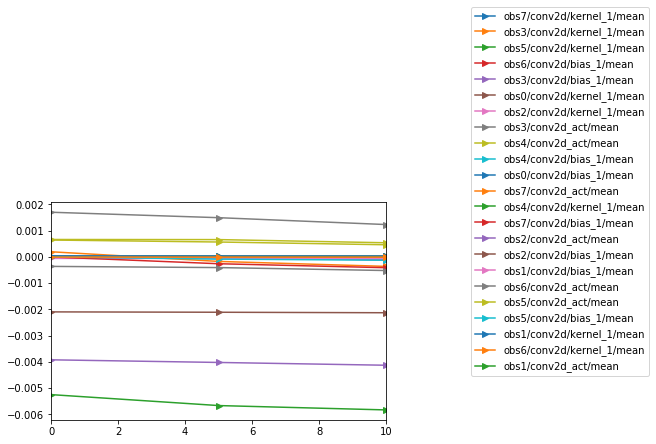

In [34]:
analysor.plot(marker='>')
plt.legend(loc='right',bbox_to_anchor=(1.8, 1.05))

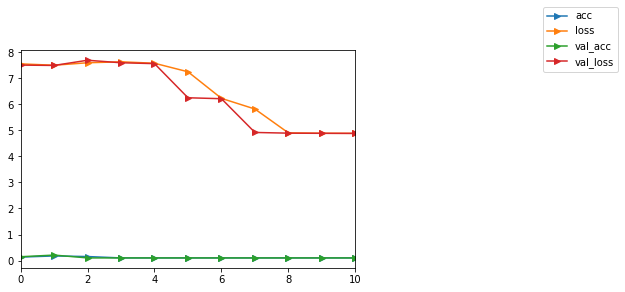

In [33]:
scalars.plot(marker='>')
plt.legend(loc='right',bbox_to_anchor=(1.8, 1.05))

In [13]:
scalars

,acc,loss,val_acc,val_loss
0,0.13156,7.558245,0.1454,7.511126
1,0.17576,7.506195,0.2088,7.498263
2,0.15258,7.601239,0.1000,7.697995
3,0.10000,7.637783,0.1000,7.600890
4,0.10000,7.582485,0.1000,7.567765
5,0.10000,7.254681,0.1000,6.255698
6,0.10000,6.232026,0.1000,6.219235
7,0.10000,5.822876,0.1000,4.922634
8,0.10000,4.904716,0.1000,4.895343
9,0.10000,4.891667,0.1000,4.888906
